In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('./datasets/resume_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [5]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [6]:
df.Category.value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Sales                        40
Operations Manager           40
Mechanical Engineer          40
Data Science                 40
Arts                         36
Database                     33
Electrical Engineering       30
PMO                          30
Health and fitness           30
DotNet Developer             28
Business Analyst             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: Category, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Category'>

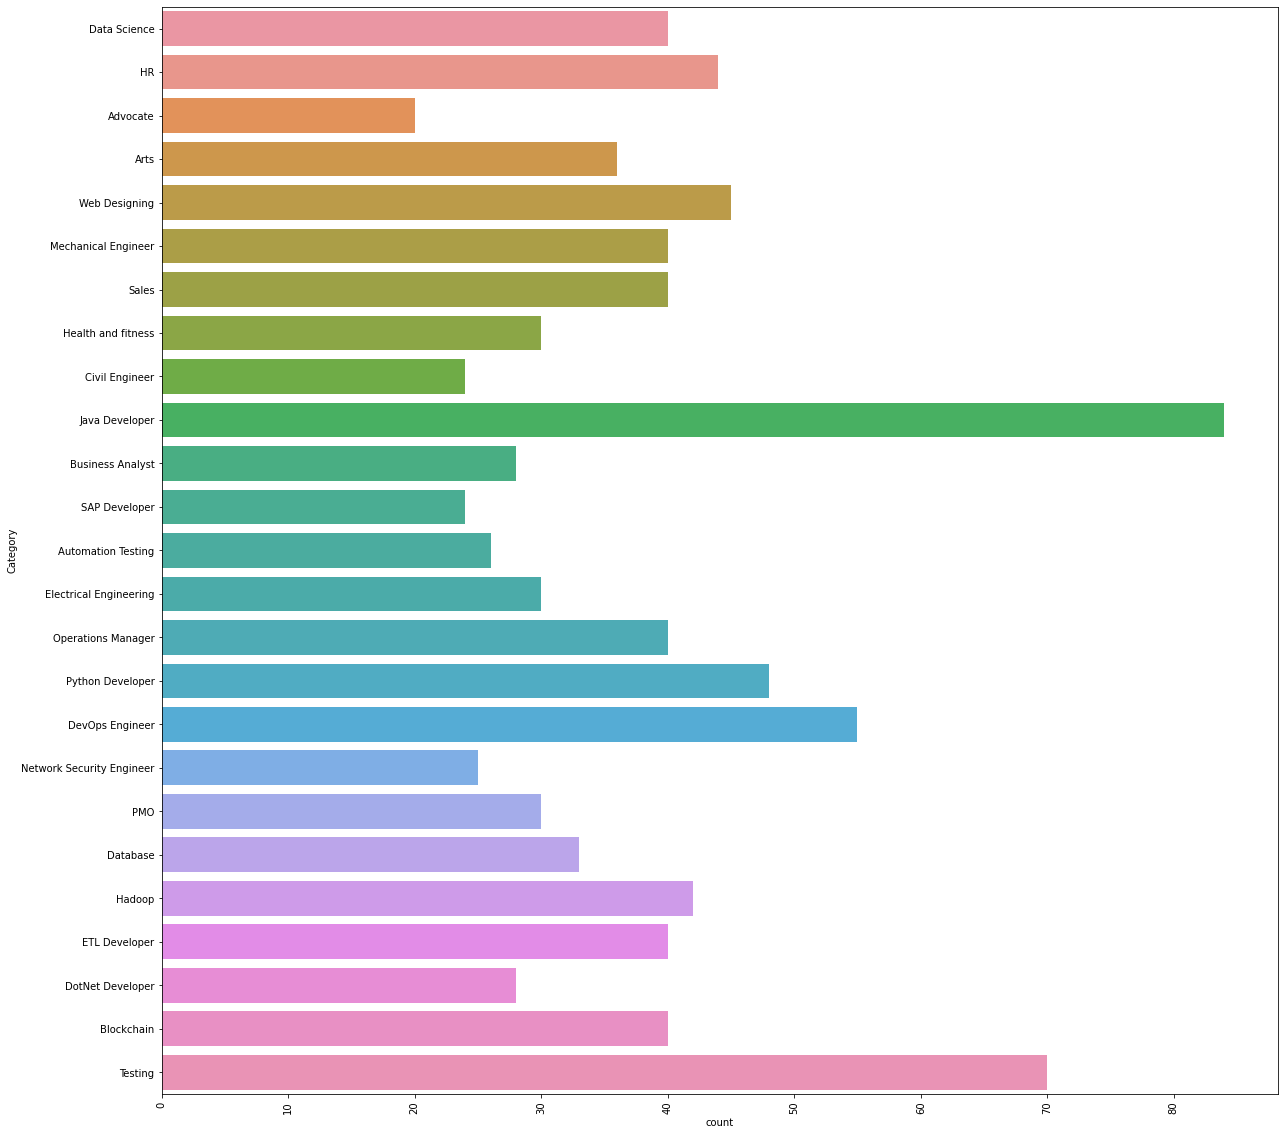

In [12]:
import seaborn as sns
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=df)

## Preprocessing and Cleaning Text

In [27]:
test_resume = df['Resume'].values[0]

In [37]:
import nltk
from nltk.corpus import stopwords
import string
import re

In [26]:
stopword_all =  list(set(stopwords.words('english'))) 
stopword_all.extend(list(string.punctuation))
print(len(stopword_all))

211


In [38]:
token = nltk.word_tokenize(test_resume)
cleaned_token = [t.lower() for t in token if t not in stopword_all]
print(len(cleaned_token),len(token))
cleaned_token[:10]

501 806


['skills',
 'programming',
 'languages',
 'python',
 'pandas',
 'numpy',
 'scipy',
 'scikit-learn',
 'matplotlib',
 'sql']

In [49]:
clean_text_demo = ' '.join(cleaned_token)
demo_text = re.sub('http\S+\s*',' ',clean_text_demo) # remove urls
demo_text = re.sub('RT|cc',' ',demo_text) # RT and cc
demo_text = re.sub('#\S+|@\S+',' ',demo_text) # hashtags and mentions
demo_text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', demo_text)  # remove punctuations
demo_text = re.sub(r'[^\x00-\x7f]',' ', demo_text) 
demo_text = re.sub('\s+',' ',demo_text) # remove extra spaces
# demo_text = re.sub('\d+',' ',demo_text)

In [50]:
demo_text

'skills programming languages python pandas numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na ve bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch d3 js dc js plotly kibana matplotlib ggplot tableau others regular expression html css angular 6 logstash kafka python flask git docker computer vision open cv understanding deep learning education details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience 24 months jquery exprience 24 months python exprience 24 monthscompany details company ernst young llp description fraud investigations dispute services assurance technology assisted review tar technology assisted review assists a elerating review process run

In [51]:
def clean_text(doc):
    ''' Pre-processing of document , basic cleaning and stopword removal '''
    doc = re.sub('http\S+\s*',' ',doc) # remove urls
    doc = re.sub('RT|cc',' ',doc) # RT and cc
    doc = re.sub('#\S+|@\S+',' ',doc) # hashtags and mentions
    doc = re.sub(r'[^\x00-\x7f]',' ', doc) 
    doc = re.sub('\s+',' ',doc) # remove extra spaces
    
    tokens = nltk.word_tokenize(doc)
    cleaned_token = [token.lower() for token in tokens if token not in stopword_all]
    
    return ' '.join(cleaned_token)

In [52]:
df['cleaned_resume'] = df['Resume'].apply(lambda x: clean_text(x))

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        962 non-null    object
 1   Resume          962 non-null    object
 2   cleaned_resume  962 non-null    object
dtypes: object(3)
memory usage: 22.7+ KB


In [54]:
df.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may 2013 may 2017 b.e uit-rg...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas interest deep learning control system de...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...


In [57]:
total_words = (' '.join(df['cleaned_resume'].values)).split(' ')
print(len(total_words))

319038


In [58]:
freq_dist = nltk.FreqDist(total_words)
most_common = freq_dist.most_common(50)
most_common

[('exprience', 3829),
 ('company', 3570),
 ('project', 3333),
 ('months', 3288),
 ('description', 3122),
 ('details', 3096),
 ('data', 2129),
 ('management', 1925),
 ('team', 1921),
 ('1', 1837),
 ('maharashtra', 1449),
 ('6', 1369),
 ('system', 1369),
 ('year', 1332),
 ('testing', 1264),
 ('database', 1216),
 ('business', 1195),
 ('development', 1179),
 ('less', 1145),
 ('test', 1143),
 ('using', 1124),
 ('skill', 1101),
 ('january', 1090),
 ('client', 1061),
 ('application', 1046),
 ('developer', 1041),
 ('engineering', 1035),
 ('pune', 1019),
 ('work', 987),
 ('skills', 947),
 ('services', 943),
 ('ltd', 931),
 ('java', 917),
 ('sql', 912),
 ('software', 874),
 ('responsibilities', 856),
 ('pvt', 831),
 ("'s", 823),
 ('reports', 814),
 ('process', 792),
 ('requirements', 790),
 ('customer', 770),
 ('technologies', 759),
 ('technical', 755),
 ('monthscompany', 746),
 ('working', 745),
 ('university', 745),
 ('sales', 743),
 ('india', 738),
 ('various', 727)]

In [60]:
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()
df['Category'] = label_encode.fit_transform(df['Category'])
df.head()

,Category,Resume,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,education details may 2013 may 2017 b.e uit-rg...
2,6,"Areas of Interest Deep Learning, Control Syste...",areas interest deep learning control system de...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...


In [69]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score , classification_report
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [62]:
resume_data = df['cleaned_resume'].values
resume_target = df['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(resume_data)
word_features = word_vectorizer.transform(resume_data)


In [67]:
X_train,X_test,y_train,y_test = train_test_split(word_features,resume_target,random_state=0, test_size=0.2)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(769, 1500) (769,)
(193, 1500) (193,)


In [71]:
# model 1
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy ,training set: {}'.format(clf.score(X_train, y_train)))
print('Accuracy ,test set: {}'.format(clf.score(X_test, y_test)))

print(classification_report(y_test,y_pred))

Accuracy ,training set: 0.9934980494148244
Accuracy ,test set: 0.9896373056994818
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        19

In [73]:
# model 2
clf2 = MultinomialNB()
clf2.fit(X_train,y_train)
y_pred2 = clf.predict(X_test)

print('Accuracy ,training set: {}'.format(clf.score(X_train, y_train)))
print('Accuracy ,test set: {}'.format(clf.score(X_test, y_test)))

print(classification_report(y_test,y_pred2))

Accuracy ,training set: 0.9934980494148244
Accuracy ,test set: 0.9896373056994818
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        19

In [80]:
import joblib
joblib.dump(clf2,'./models/multinomial_nb.pkl')

['./models/multinomial_nb.pkl']

In [ ]:
# should have done above
joblib.dump(clf2,'./models/naive_bayes/multinomial_nb.pkl')
joblib.dump(clf2,'./models/naive_bayes/output_label_encoder.pkl')
joblib.dump(word_vectorizer,'./models/naive_bayes/word_vec_encoder.pkl')

In [86]:
test=['skills programming languages python pandas numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na ve bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch d3 js dc js plotly kibana matplotlib ggplot tableau others regular expression html css angular 6 logstash kafka python flask git docker computer vision open cv understanding deep learning education details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience 24 months jquery exprience 24 months python exprience 24 monthscompany details company ernst young llp description fraud investigations dispute services assurance technology assisted review tar technology assisted review assists a elerating review process run analytics generate reports core member team helped developing automated review platform tool scratch assisting e discovery domain tool implements predictive coding topic modelling automating reviews resulting reduced labor costs time spent lawyers review understand end end flow solution research development classification models predictive analysis mining information present text data worked analyzing outputs precision monitoring entire tool tar assists predictive coding topic modelling evidence following ey standards developed classifier models order identify red flags fraud related issues tools technologies python scikit learn tfidf word2vec doc2vec cosine similarity na ve bayes lda nmf topic modelling vader text blob sentiment analysis matplot lib tableau dashboard reporting multiple data science and analytic projects usa clients text analytics motor vehicle customer review data received customer feedback survey data past one year performed sentiment positive negative neutral time series analysis customer comments across 4 categories created heat map terms survey category based frequency words extracted positive negative words across survey categories plotted word cloud created customized tableau dashboards effective reporting visualizations chatbot developed user friendly chatbot one products handle simple questions hours operation reservation options this chat bot serves entire product related questions giving overview tool via qa platform also give recommendation responses user question build chain relevant answer this intelligence build pipeline questions per user requirement asks relevant recommended questions tools technologies python natural language processing nltk spacy topic modelling sentiment analysis word embedding scikit learn javascript jquery sqlserver information governance organizations make informed decisions information store the integrated information governance portfolio synthesizes intelligence across unstructured data sources facilitates action ensure organizations best positioned counter information risk scan data multiple sources formats parse different file formats extract meta data information push results indexing elastic search created customized interactive dashboards using kibana preforming rot analysis data give information data helps identify content either redundant outdated trivial preforming full text search analysis elastic search predefined methods tag pii personally identifiable information social security numbers addresses names etc frequently targeted cyber attacks tools technologies python flask elastic search kibana fraud analytic platform fraud analytics investigative platform review red flag cases fap fraud analytics investigative platform inbuilt case manager suite analytics various erp systems it used clients interrogate a ounting systems identifying anomalies indicators fraud running advanced analytics tools technologies html javascript sqlserver jquery css bootstrap node js d3 js dc js']

In [87]:
word_vec = word_vectorizer.transform(test)
word_vec

<1x1500 sparse matrix of type '<class 'numpy.float64'>'
	with 167 stored elements in Compressed Sparse Row format>

In [88]:
test_x = word_vec
loaded_clf = joblib.load('./models/multinomial_nb.pkl')
ans = loaded_clf.predict(test_x)
print(ans)

[6]


In [89]:
label_encode.inverse_transform(ans)

array(['Data Science'], dtype=object)

In [90]:
# df.head()

,Category,Resume,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,education details may 2013 may 2017 b.e uit-rg...
2,6,"Areas of Interest Deep Learning, Control Syste...",areas interest deep learning control system de...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...


In [92]:
# df.to_csv('./datasets/cleaned_resume.csv',index=False)